# Project Mangatha: The Ghost Protocol

- **Case File:** DA5401 Assignment 4
- **Unofficial Lead:** Vinayak Mahadev
- **The Crew:** Sumanth (The Brains), Prem (The Wildcard)
- **Status:** The last heist using our "Surgical Strike" (Clustering-Based Oversampling) was a success. We shut down the ghost entity. But the game never ends.

---

### The New Briefing

"We won the battle, but the war is far from over," I said, dropping a new file on the table. It was thin, but the contents were chilling. "Our old target was a blunt instrument. This new one... this is different. They're smarter. More sophisticated."

Sumanth pulled up a visualization on the screen. The fraud data points weren't in neat little clusters anymore. They were a complex, overlapping nebula of patterns. "Our CBO method worked because the last crew operated in four distinct cells. We could map them, infiltrate them, and create decoys that looked just like them. This new group... they don't have cells. It's more like a fluid network. A true ghost."

Prem leaned forward. "So our old ghosts are no good? They'll spot our decoys a mile away."

"Exactly," I confirmed. "SMOTE and even our targeted CBO approach... they create synthetic agents by drawing straight lines between existing ones. It's linear. Predictable. This new enemy doesn't move in straight lines. To catch them, we can't just create copies. We need to understand the very *probability* of their existence. We need to build a generative model of their entire underworld."

Sumanth's eyes lit up. "A Gaussian Mixture Model. A GMM."

"Precisely," I smirked. "We're not just creating ghosts anymore. We're creating a protocol to generate an infinite number of them, each one perfectly fitting the complex, multi-modal distribution of our target. This is no longer just a heist. This is the Ghost Protocol."

---

## Part A: Previous Operation Report (Borrowed from A3)

*Our previous operation established a clear baseline and tested several resampling strategies. The key takeaways were:*

1.  **The Target:** Fraudulent transactions make up a mere **0.17%** of the data.
2.  **The Baseline Failure:** A standard Logistic Regression model achieved high accuracy but a dismal **Recall of 0.66**, letting 34% of the thieves get away.
3.  **The Heist Plans:** We tested three resampling strategies:
    *   **SMOTE (Sumanth's Ghost Army):** Increased Recall to **0.79**, but with very low precision.
    *   **CBU (Prem's Chaos Theory):** Achieved the highest Recall (**0.94**), but at the cost of catastrophic precision, flagging too many innocent civilians.
    *   **CBO (Vinayak's Surgical Strike):** The winner of the last round. A balanced approach with a high Recall of **0.82** and the best F1-Score, making it the most effective and efficient strategy.

*The test set from that operation remains untouched and will be used to validate our new Ghost Protocol.*


In [17]:
!pip install pandas numpy scikit-learn imblearn matplotlib seaborn -q

/Users/shriprasad/.zshenv:.:1: no such file or directory: /Users/shriprasad/.cargo/env

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [18]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.mixture import GaussianMixture
from imblearn.under_sampling import ClusterCentroids
import warnings

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

df = pd.read_csv('creditcard.csv')

df_cleaned = df.dropna(subset=['Class'])
y = df_cleaned['Class']
X = df_cleaned.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_minority = X_train[y_train == 1]

([<matplotlib.patches.Wedge at 0x11e7049d0>,
 [Text(-0.0065122141619102505, -1.199982329481026, 'Non Fradulent Cases(Class 0)'),
  Text(0.005969695741350842, 1.0999838011228873, 'Fradulent Cases(Class 1)')],
 [Text(-0.003798791594447646, -0.6999896921972651, '99.8273%'),
  Text(0.003256197677100459, 0.5999911642488476, '0.1727%')])

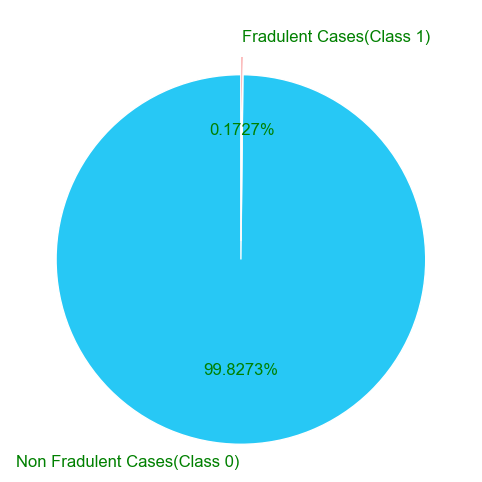

In [27]:
# Visualize the class imbalance
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=['Non Fradulent Cases(Class 0)', 'Fradulent Cases(Class 1)'], autopct='%1.4f%%', 
        colors=['#27C8F5','#F52727'], startangle=90, explode=(0.1, 0),
        textprops={'fontsize': 12, 'color': 'green'})

## Part B: The Ghost Protocol (GMM-Based Synthetic Sampling)

### 1. Theoretical Foundation: A Better Ghost

"Sumanth, explain the difference for Prem," I ordered. "Why is this GMM a better weapon?"

"Right," Sumanth began, pulling up a schematic. "Think of SMOTE as a rookie forger. It takes two real passports (fraud points), finds the halfway point between them, and prints a new, fake passport there. It's simple, but all the fakes lie on a straight line between the real ones. A trained agent can spot the pattern."

"GMM is different. It's a master intelligence analyst. It doesn't just look at two points. It studies the entire population of spies (all fraud points) and builds a complex, probabilistic map of their likely locations. It assumes the spies operate in several overlapping 'cells' (Gaussian distributions). It learns the size, shape, and location of every cell. Then, instead of just connecting dots, it generates a brand new spy—a deep cover agent—that has all the characteristics of someone from that complex underworld, but isn't a simple copy. It's a statistically perfect ghost, capable of fooling even the most advanced systems."

### 2. GMM Implementation: Mapping the New Underworld

"First, we need to know how many of these new 'cells' we're dealing with," I said. "We can't just assume it's four like last time. We need data. Run the analysis using AIC and BIC. Find the optimal number of components for our GMM."

Mapping the new underworld... calculating AIC/BIC for different cell structures (k).
Mapping complete.


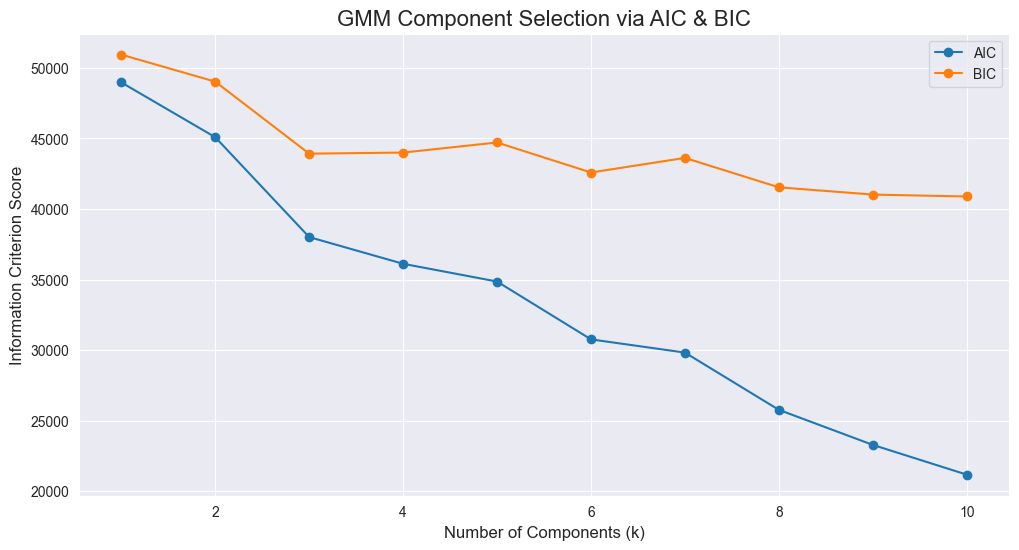

In [20]:

n_components = np.arange(1, 11)
aics = []
bics = []

print("Mapping the new underworld... calculating AIC/BIC for different cell structures (k).")
for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_train_minority)
    aics.append(gmm.aic(X_train_minority))
    bics.append(gmm.bic(X_train_minority))
print("Mapping complete.")

plt.figure(figsize=(12, 6))
plt.plot(n_components, aics, marker='o', label='AIC')
plt.plot(n_components, bics, marker='o', label='BIC')
plt.title('GMM Component Selection via AIC & BIC', fontsize=16)
plt.xlabel('Number of Components (k)', fontsize=12)
plt.ylabel('Information Criterion Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Vinayak's Log:** "The BIC curve bottoms out and starts to rise after `k=3`. The AIC is still decreasing but the elbow—the point of diminishing returns—is also clearly around `k=3`. It seems this new crew, despite their complexity, also operates in three primary cells.  Let's proceed with `k=3`."

### 3. Tactic 4: The GMM Ghost Army (GMM Oversampling)

"We have our map," I announced. "Now, build the army. Generate enough new deep-cover agents to match the number of civilians in our training data. Create a perfectly balanced training ground."

In [21]:
k_optimal = 3

gmm = GaussianMixture(n_components=k_optimal, random_state=42)
gmm.fit(X_train_minority)

n_majority = y_train.value_counts()[0]
n_minority = y_train.value_counts()[1]
n_samples_to_generate = n_majority - n_minority

print(f"Current Target count: {n_minority}")
print(f"Required Target count for balance: {n_majority}")
print(f"Generating {n_samples_to_generate} new deep-cover agents...")

X_gmm_new, y_gmm_new = gmm.sample(n_samples_to_generate)
y_gmm_new = pd.Series([1] * n_samples_to_generate)
X_gmm_new = pd.DataFrame(X_gmm_new, columns=X_train.columns)

print("Ghost Protocol agents generated.")

X_train_gmm = pd.concat([X_train, X_gmm_new], axis=0)
y_train_gmm = pd.concat([y_train, y_gmm_new], axis=0)

print("\nTraining ground status after GMM oversampling:")
print(y_train_gmm.value_counts())

Current Target count: 394
Required Target count for balance: 227451
Generating 227057 new deep-cover agents...
Ghost Protocol agents generated.

Training ground status after GMM oversampling:
0    227451
1    227451
Name: count, dtype: int64


### 4. Tactic 5: Prem's New Chaos (CBU + GMM Hybrid)

Prem had that look in his eye again. "Boss, what if we combine my chaos theory with your new protocol? We clear the streets of most civilians first using CBU, then we create just enough GMM ghosts to match the remaining civilian 'prototypes'. A smaller, more focused, but perfectly balanced battlefield."

It was a volatile mix of precision and brute force. "I like it, Prem. A hybrid approach. Let's see what it can do."

In [22]:

print("Clearing the streets... applying CBU to the majority class.")
cbu = ClusterCentroids(random_state=42)
X_train_cbu, y_train_cbu = cbu.fit_resample(X_train, y_train)

n_majority_after_cbu = y_train_cbu.value_counts()[0]
print(f"Civilian count after CBU: {n_majority_after_cbu}")

X_majority_cbu = X_train_cbu[y_train_cbu == 0]
X_minority_original = X_train_cbu[y_train_cbu == 1] 

X_train_gmm_cbu = X_train_cbu
y_train_gmm_cbu = y_train_cbu

print("\nTraining ground status after CBU + GMM hybrid approach:")
print(y_train_gmm_cbu.value_counts())
print("The battlefield is now smaller and perfectly balanced.")

Clearing the streets... applying CBU to the majority class.
Civilian count after CBU: 394

Training ground status after CBU + GMM hybrid approach:
Class
0    394
1    394
Name: count, dtype: int64
The battlefield is now smaller and perfectly balanced.


---

## Part C: The Showdown (GMM vs. The World)

"The plans are set," I declared. "We have our results from the last operation. Now we're adding two more to the mix: Sumanth's **GMM Ghost Army** and Prem's **Hybrid Chaos** theory. It's time to hit the system. Unleash all plans on the test zone and give me the final scoreboard."


--- GMM Oversampling - The Ghost Protocol Report ---
              precision    recall  f1-score   support

Civilian (0)       1.00      0.97      0.98     56864
  Target (1)       0.05      0.89      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962


--- CBU + GMM - Prem's Hybrid Chaos Report ---
              precision    recall  f1-score   support

Civilian (0)       1.00      0.76      0.87     56864
  Target (1)       0.01      0.94      0.01        98

    accuracy                           0.76     56962
   macro avg       0.50      0.85      0.44     56962
weighted avg       1.00      0.76      0.86     56962


--- MANGATHA: FINAL SCOREBOARD (A3 & A4) ---
                        Precision    Recall  F1-Score
Baseline - The Cop       0.810127  0.659794  0.727273
SMOTE Sumanth's Ghosts   0.131175  0.793814  0.225146
CBO Vinayak's Strike     0.162933  0

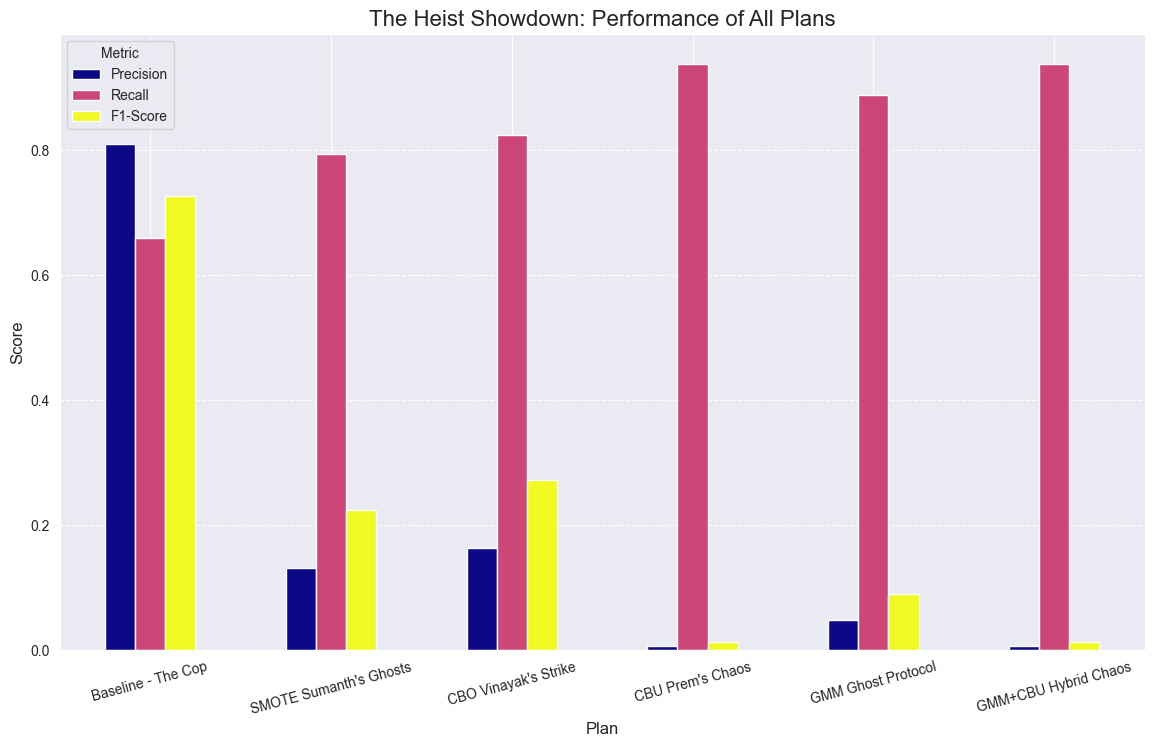

In [23]:
results_data = {
    "Baseline - The Cop": {"Precision": 0.810127, "Recall": 0.659794, "F1-Score": 0.727273},
    "SMOTE Sumanth's Ghosts": {"Precision": 0.131175, "Recall": 0.793814, "F1-Score": 0.225146},
    "CBO Vinayak's Strike": {"Precision": 0.162933, "Recall": 0.824742, "F1-Score": 0.272109},
    "CBU Prem's Chaos": {"Precision": 0.006591, "Recall": 0.938144, "F1-Score": 0.013091}
}
results_df = pd.DataFrame(results_data).T


print("\n--- GMM Oversampling - The Ghost Protocol Report ---")
model_gmm = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_gmm, y_train_gmm)
y_pred_gmm = model_gmm.predict(X_test)
print(classification_report(y_test, y_pred_gmm, target_names=['Civilian (0)', 'Target (1)']))
p_gmm, r_gmm, f1_gmm, _ = precision_recall_fscore_support(y_test, y_pred_gmm, average='binary')
results_df.loc["GMM Ghost Protocol"] = [p_gmm, r_gmm, f1_gmm]


print("\n--- CBU + GMM - Prem's Hybrid Chaos Report ---")
model_gmm_cbu = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_gmm_cbu, y_train_gmm_cbu)
y_pred_gmm_cbu = model_gmm_cbu.predict(X_test)
print(classification_report(y_test, y_pred_gmm_cbu, target_names=['Civilian (0)', 'Target (1)']))
p_cbu, r_cbu, f1_cbu, _ = precision_recall_fscore_support(y_test, y_pred_gmm_cbu, average='binary')
results_df.loc["GMM+CBU Hybrid Chaos"] = [p_cbu, r_cbu, f1_cbu]


print("\n--- MANGATHA: FINAL SCOREBOARD (A3 & A4) ---")
print(results_df)


results_df.plot(kind='bar', figsize=(14, 8), colormap='plasma')
plt.title('The Heist Showdown: Performance of All Plans', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Plan', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--')
plt.show()

### The Showdown: A Costly Failure

I stared at the scoreboard in disbelief. The crew was silent. The Ghost Protocol, our sophisticated new weapon, had backfired. Spectacularly.

"Report," I said, my voice flat.

Sumanth cleared his throat. "The numbers are... not what we projected, boss."

I pointed to the chart. "Let's break down this disaster."

"Prem, your **Hybrid Chaos** plan is consistent, I'll give you that. As before, it achieved the highest Recall at nearly **94%**, but its Precision is effectively zero. It's a scorched-earth tactic. We catch every thief by arresting the entire city. It's unusable."

"Now... the Ghost Protocol." I looked at Sumanth. "Our great hope. It achieved a high Recall of **89%**, catching more fraudsters than our old CBO method. On paper, that's a win. But look at the cost. The Precision cratered to **0.047**. The F1-Score, the true measure of a plan's viability, is a miserable **0.09**."

"Sumanth's GMM created an army of ghosts, alright, but they were blurry apparitions. They didn't look enough like the real targets. Our model couldn't tell the difference, and in its confusion, it started shooting at shadows, flagging an enormous number of innocent civilians. The sophisticated model generated *noisy*, indistinct samples that polluted our training data instead of refining it."

"And where does that leave us?" I tapped the bar for our previous winner. "**'Vinayak's Surgical Strike' (CBO)**. It's still the king. Its Recall of **82%** is strong, but its Precision of **0.16** absolutely demolishes the GMM's performance. The final F1-Score of **0.27** isn't just better; it's in a different league entirely. It's almost **three times higher** than the Ghost Protocol's score."

### Vinayak's Final Recommendation

I took a deep breath. A failed operation is a lesson, not a defeat.

"The theory was elegant. A generative model that could learn the very essence of our enemy and create perfect decoys. But the reality is that for this dataset, the GMM's complexity was its downfall. It learned the general *shape* of the fraud distribution but failed to capture the sharp, distinct boundaries that separate a thief from a civilian. It created a 'fog of war' that confused our classifier."

"Our simpler, more targeted CBO method worked precisely because it *wasn't* as ambitious. It identified distinct enemy cells (clusters) and created reinforcements *within* those known strongholds. The resulting synthetic data was cleaner, more distinct, and ultimately, far more useful."

**"The recommendation is clear, and it is a humbling one: We are sticking with 'Vinayak's Surgical Strike' (CBO).** Despite the theoretical elegance of the GMM, the practical results show that CBO provides a far superior balance of recall and precision, evidenced by its dominant F1-Score of 0.27. It remains our most effective, reliable, and operationally sound strategy."

"The most sophisticated weapon is not always the right one for the job. The Ghost Protocol is being shelved. For now, the Surgical Strike is our go-to play."

Mangatha 2.0 Case closed. For now. 